In [272]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

## generating data...

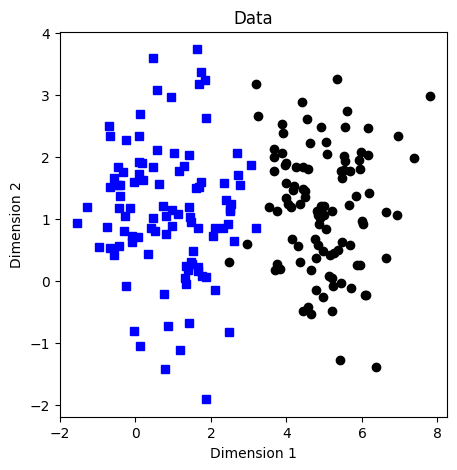

In [273]:
nPerClust = 100
blur = 1

A = [ 1, 1 ]
B = [ 5, 1 ]

a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur ]

labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))
data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
plt.title('Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## build the model :3

In [274]:
ANNclassify = nn.Sequential(
    nn.Linear(2,1), # input layer
    nn.ReLU(),      # activation unit
    nn.Linear(1,1), # output unit
    nn.Sigmoid()    # final activation unit
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

>> model params

In [275]:
learn_rate = 0.01
# binary cross entropy loss
loss_fn = nn.BCELoss()
# stochastic gradient descent
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learn_rate)

## reminder!

### Stochastic Gradient Descent (SGD)
where $w$ is the set of weights, $\eta$ the learning rate, and $\partial\mathcal{L}$ the partial derivative of the loss function with respect to the weights.

$$w\leftarrow \eta\partial\mathcal{L}\$$

### Binary Cross-Entropy (BCE)
where $y$ is the set of labels and $p(y)$ is the probability.

$$H_p(q) = -\frac{1}{N}\sum^N_{i=1}y_i\log(p(y_i))+(1-y_i)\log(1-p(y_i))$$


## train 1k epochs

In [276]:
epochs = 1000
losses = np.zeros(epochs)

for i in range(epochs):
    yHat = ANNclassify(data)
    loss = loss_fn(yHat, labels)
    losses[i] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

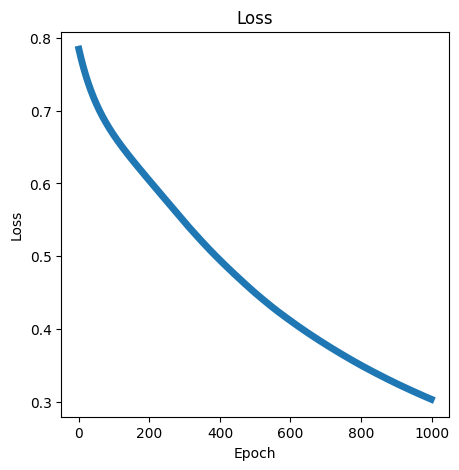

In [277]:
fig = plt.figure(figsize=(5,5))
plt.plot(losses,linewidth=5)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## a last forward prop to gauge model performance

In [278]:
predictions = ANNclassify(data)
predlabels = predictions>0.5

misclassified = np.where(predlabels!=labels)[0]

totalacc = 100-100*len(misclassified)/(2*nPerClust)

print(f'Final accuracy: {totalacc:.2f}%')

Final accuracy: 90.00%


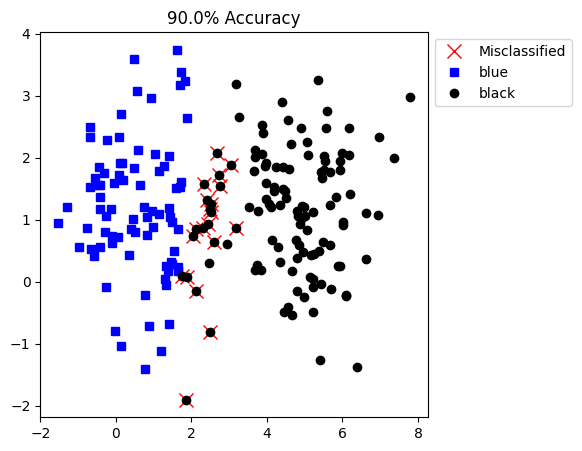

In [279]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0], data[misclassified,1], 'rx', markersize=10)
plt.plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0],1], 'bs')
plt.plot(data[np.where(predlabels)[0],0], data[np.where(predlabels)[0],1], 'ko')

plt.legend(['Misclassified', 'blue', 'black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% Accuracy')
plt.show()